In [2]:
import pandas as pd
import numpy as np

In [ ]:
# Read the data set - Da vinchi code book review comments

In [4]:
sentiment_df = pd.read_csv('data\sentiment_train', sep='\t')

In [5]:
sentiment_df[-10:]

,sentiment,text
6908,0,Brokeback Mountain is fucking horrible..
6909,0,"Then snuck into Brokeback Mountain, which is t..."
6910,0,", she helped me bobbypin my insanely cool hat ..."
6911,0,My dad's being stupid about brokeback mountain...
6912,0,"Oh, and Brokeback Mountain is a TERRIBLE movie..."
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.
6917,0,"Oh, and Brokeback Mountain was a terrible movie."


## Feature Extraction

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
count_vec = CountVectorizer()

### Fit to create dictionary of words

In [11]:
count_vec.fit(sentiment_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
x_features = count_vec.get_feature_names()

In [16]:
x_features[-10:]

['yip', 'you', 'young', 'younger', 'your', 'yuck', 'yuh', 'zach', 'zen', 'µª']

In [17]:
len(x_features)

2132

In [18]:
sentiment_vec_df = count_vec.transform(sentiment_df.text)

In [19]:
sentiment_vec_df.shape

(6918, 2132)

In [20]:
token_sums = np.sum(sentiment_vec_df.toarray(), axis = 0)

In [21]:
token_sums

array([ 1,  1,  4, ...,  1, 80,  1], dtype=int64)

In [22]:
token_frequencies_df = pd.DataFrame({'fearture': x_features, 'count': token_sums})

### High frequency words

In [23]:
token_frequencies_df.sort_values('count', ascending=False)[0:10]

,fearture,count
1864,the,3306
93,and,2154
864,harry,2093
1466,potter,2093
355,code,2002
2009,vinci,2001
442,da,2001
1272,mountain,2000
259,brokeback,2000
1171,love,1624


### Low frequency words

In [24]:
len(token_frequencies_df[token_frequencies_df['count'] ==1])

1228

### Steps to reduce number of features
####  remove stop words
####  remove low frequency and hig frequencywords

In [28]:
from sklearn.feature_extraction import text

In [29]:
stopwords = list(text.ENGLISH_STOP_WORDS)

In [30]:
stopwords

['third',
 'via',
 'they',
 'that',
 'below',
 'to',
 'although',
 'eg',
 'mill',
 'without',
 'indeed',
 'among',
 'against',
 'mine',
 'least',
 'two',
 'will',
 'anything',
 'next',
 'all',
 'system',
 'being',
 'part',
 'back',
 'almost',
 'fifteen',
 'front',
 'latterly',
 'should',
 'were',
 'others',
 'down',
 'either',
 'interest',
 'elsewhere',
 'them',
 'enough',
 'first',
 'has',
 'fill',
 'whose',
 'already',
 'become',
 'may',
 'empty',
 'other',
 'anywhere',
 'except',
 'toward',
 'between',
 'eight',
 'ourselves',
 'over',
 'what',
 'sometimes',
 'themselves',
 'also',
 'during',
 'formerly',
 'co',
 'find',
 'call',
 'than',
 'these',
 'us',
 'five',
 'thereby',
 'serious',
 'further',
 'within',
 'thru',
 'seeming',
 'though',
 'give',
 'nor',
 'nothing',
 'ten',
 'ever',
 'bottom',
 'former',
 'done',
 'i',
 'seemed',
 'am',
 'under',
 'me',
 'our',
 'mostly',
 'six',
 'whereby',
 'namely',
 'nowhere',
 'becoming',
 'hasnt',
 'go',
 'couldnt',
 'fifty',
 'behind',
 't

#### Adding our own set of stopwords

In [31]:
stopwords = stopwords +['movies']

### remove stop words

In [32]:
count_vec_v2 = CountVectorizer(stop_words = stopwords, 
                               min_df = 3,
                              max_df = 0.7)

In [33]:
count_vec_v2.fit(sentiment_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.7, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['third', 'via', 'they', 'that', 'below', 'to',
                            'although', 'eg', 'mill', 'without', 'indeed',
                            'among', 'against', 'mine', 'least', 'two', 'will',
                            'anything', 'next', 'all', 'system', 'being',
                            'part', 'back', 'almost', 'fifteen', 'front',
                            'latterly', 'should', 'were', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
x_features =count_vec_v2.get_feature_names()

In [35]:
len(x_features)

435

In [36]:
sentiment_df[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


In [37]:
sentiment_vec_df = count_vec_v2.transform(sentiment_df.text)

In [56]:
x_features.index('awesome')

19

In [57]:
sentiment_vec_df.toarray()[0:1, 15:25]

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [58]:
sentiment_vec_df.getnnz()

40550

In [59]:
sentiment_vec_df.getnnz()/(6918*435)

0.013474760162561102

In [60]:
sentiment_vec_ds =pd.DataFrame(sentiment_vec_df.todense())

In [61]:
sentiment_vec_ds[0:5]

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
sentiment_vec_ds.columns =x_features

In [63]:
sentiment_vec_ds[0:5]

,10,17,6th,absolutely,absurd,acceptable,aching,acne,action,actually,...,world,worth,worthless,wotshisface,write,wrong,yeah,year,yes,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
sentiment_vec_ds['sentiment'] = sentiment_df.sentiment

In [65]:
import matplotlib.pyplot as plt
import seaborn as sn

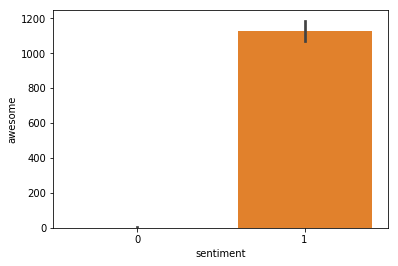

In [66]:
sn.barplot(x = 'sentiment',
           y = 'awesome',           
           data = sentiment_vec_ds,
           estimator = sum
          )

### Splitting the data set

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_vec_ds[x_features],
                                  sentiment_vec_ds['sentiment'],
                                  train_size = 0.8,
                                  random_state =42)

In [69]:
from sklearn.naive_bayes import BernoulliNB

In [70]:
nb_vl = BernoulliNB()

In [71]:
nb_vl.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [72]:
y_pred = nb_vl.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cm_vl = confusion_matrix(y_test, y_pred, [1,0])

In [75]:
cm_vl

array([[801,   3],
       [ 23, 557]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       580
           1       0.97      1.00      0.98       804

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



In [78]:
801/(23+801)

0.9720873786407767

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
rf_v1 =RandomForestClassifier()

In [82]:
rf_params = {'n_estimators': [100],
            'criterion' : ['gini'],
            'max_depth' : [10,15],
            'max_features': [0.1, 0.2]}

In [83]:
grid_v1 = GridSearchCV(rf_v1,
                      param_grid = rf_params,
                      cv = 10,
                      scoring = 'roc_auc')

In [84]:
grid_v1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [107]:
grid_v1.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 0.2,
 'n_estimators': 100}

In [108]:
grid_v1.grid_scores_

[mean: 0.99806, std: 0.00103, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.1, 'n_estimators': 100},
 mean: 0.99860, std: 0.00060, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.2, 'n_estimators': 100},
 mean: 0.99892, std: 0.00065, params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 0.1, 'n_estimators': 100},
 mean: 0.99934, std: 0.00041, params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 0.2, 'n_estimators': 100}]

In [109]:
grid_v1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
rf_final = grid_v1.best_estimator_

In [114]:
feature_imp_df = pd.DataFrame({'feature' : x_features,
                              'importance': rf_final.feature_importances_})

In [115]:
feature_imp_df.sort_values('importance', ascending = False)[0:20]

,feature,importance
245,love,0.205332
19,awesome,0.133214
365,sucked,0.074402
367,sucks,0.073639
173,hate,0.054732
230,like,0.047970
246,loved,0.044988
263,mission,0.043628
198,impossible,0.035395
364,suck,0.031966


### Applying Stemming and lemmatization and TF-Df

In [119]:
import nltk

In [120]:
from nltk.stem.snowball  import PorterStemmer

In [123]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

In [136]:
def get_stemmed_words( doc) :
    stemmed_words = [stemmer.stem(x) for x in analyzer(doc)]    
    final_words = [word for word in stemmed_words if word not in stopwords]
    return final_words
    

In [140]:
get_stemmed_words("the is loved playing lovely")

['love', 'play', 'love']

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [144]:
tfid_vec = TfidfVectorizer(tokenizer=get_stemmed_words,ngram_range=(1,2), max_df=0.8, min_df=3)

In [145]:
tfid_vec.fit(sentiment_df.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function get_stemmed_words at 0x000001CC88D99AE8>,
        use_idf=True, vocabulary=None)

In [146]:
tfid_df = tfid_vec.transform(sentiment_df.text)

In [149]:
x_features = tfid_vec.get_feature_names()

In [150]:
len(x_features)

900

In [152]:
x_features.index('awesom')

41

In [153]:
tfid_df.toarray()[0:1, 15:25]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])